In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')


In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Assign labels
true['label'] = 1
fake['label'] = 0

In [6]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
# Concatenate dataframes
news = pd.concat([fake, true], axis=0)

In [8]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
news.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [10]:
#shuffling
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
news = news.drop(['title','subject','date'],axis=1)

In [12]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [13]:
news = news.sample(frac=1) 

In [14]:
news.head()

,text,label
11344,SAO PAULO (Reuters) - Brazil s government will...,1
5048,"(Reuters) - A government watchdog group, Publi...",1
11532,,0
171,"This morning, Donald Trump tweeted that health...",0
22146,MEMBERS can join co-hosts Patrick Henningsen ...,0


In [15]:
news.reset_index(inplace=True)

In [16]:
news.head()

,index,text,label
0,11344,SAO PAULO (Reuters) - Brazil s government will...,1
1,5048,"(Reuters) - A government watchdog group, Publi...",1
2,11532,,0
3,171,"This morning, Donald Trump tweeted that health...",0
4,22146,MEMBERS can join co-hosts Patrick Henningsen ...,0


In [17]:
news.drop(['index'],axis=1,inplace=True)

In [18]:
news.head()

,text,label
0,SAO PAULO (Reuters) - Brazil s government will...,1
1,"(Reuters) - A government watchdog group, Publi...",1
2,,0
3,"This morning, Donald Trump tweeted that health...",0
4,MEMBERS can join co-hosts Patrick Henningsen ...,0


In [19]:
# Data cleaning function
def wordopt(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d', '', text)  # Remove digits
    text = re.sub(r'\n', ' ', text)  # Remove newline characters
    return text

In [20]:
# Apply data cleaning
news['text'] = news['text'].apply(wordopt)

In [21]:
news['text']

0        sao paulo reuters  brazil s government will de...
1        reuters  a government watchdog group public ci...
2                                                         
3        this morning donald trump tweeted that health ...
4         members can join cohosts patrick henningsen a...
                               ...                        
44893    astrophysicist stephen hawking is internationa...
44894    zurich reuters  a united states consular offic...
44895    president donald trump just completed his firs...
44896    reuters  us republican presidential candidate ...
44897    washington reuters  winning over bernie sander...
Name: text, Length: 44898, dtype: object

In [22]:
# Split data into features and labels
x = news['text']
y = news['label']

In [23]:
x

0        sao paulo reuters  brazil s government will de...
1        reuters  a government watchdog group public ci...
2                                                         
3        this morning donald trump tweeted that health ...
4         members can join cohosts patrick henningsen a...
                               ...                        
44893    astrophysicist stephen hawking is internationa...
44894    zurich reuters  a united states consular offic...
44895    president donald trump just completed his firs...
44896    reuters  us republican presidential candidate ...
44897    washington reuters  winning over bernie sander...
Name: text, Length: 44898, dtype: object

In [24]:
y

0        1
1        1
2        0
3        0
4        0
        ..
44893    0
44894    1
44895    0
44896    1
44897    1
Name: label, Length: 44898, dtype: int64

In [25]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [26]:
x_train.shape

(31428,)

In [27]:
x_test.shape

(13470,)

In [28]:
# Vectorize text data
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [29]:
xv_train

<31428x174944 sparse matrix of type '<class 'numpy.float64'>'
	with 6448767 stored elements in Compressed Sparse Row format>

In [30]:
xv_test

<13470x174944 sparse matrix of type '<class 'numpy.float64'>'
	with 2731664 stored elements in Compressed Sparse Row format>

In [31]:
# Initialize models
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()


In [32]:
# Train models
LR.fit(xv_train, y_train)

LogisticRegression()

In [33]:
DTC.fit(xv_train, y_train)

DecisionTreeClassifier()

In [34]:
rfc.fit(xv_train, y_train)

RandomForestClassifier()

In [35]:
gbc.fit(xv_train, y_train)

GradientBoostingClassifier()

In [36]:
# Predictions
pred_lr = LR.predict(xv_test)
pred_dtc = DTC.predict(xv_test)
pred_rfc = rfc.predict(xv_test)
pred_gbc = gbc.predict(xv_test)

In [37]:
# Model evaluation
print("Logistic Regression:")
print(classification_report(y_test, pred_lr))
print("Decision Tree Classifier:")
print(classification_report(y_test, pred_dtc))
print("Random Forest Classifier:")
print(classification_report(y_test, pred_rfc))
print("Gradient Boosting Classifier:")
print(classification_report(y_test, pred_gbc))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7030
           1       0.99      0.99      0.99      6440

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7030
           1       1.00      1.00      1.00      6440

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7030
           1       0.99      0.99      0.99      6440

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
w

In [38]:
#predective model
def output_label(n):
    if n==0:
        return "It is a Fake News"
    elif n==1:
        return "The news is TRUE!"

In [39]:
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = LR.predict(new_xv_test)
    pred_dtc = DTC.predict(new_xv_test)
    pred_gbc = gbc.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return "\n\nLR Prediction: {}  \nDTC Prediction: {}  \nGBC Prediction: {} \nRFC Prediction: {}".format(output_label(pred_lr[0]), output_label(pred_dtc[0]), output_label(pred_gbc[0]), output_label(pred_rfc[0]))  # Missing parenthesis added here


In [40]:
news_article = input()

result = manual_testing(news_article)
print(result)


As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for no

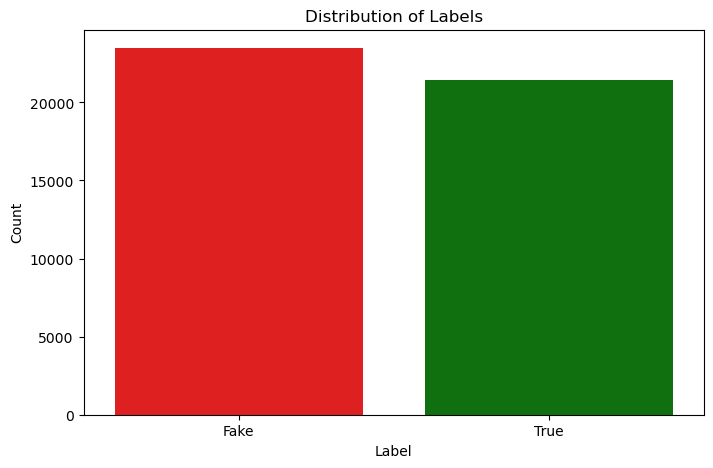

In [41]:
# Data visualization
# Plotting distribution of labels
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=news, palette={0: 'red', 1: 'green'})
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'True'])
plt.show()


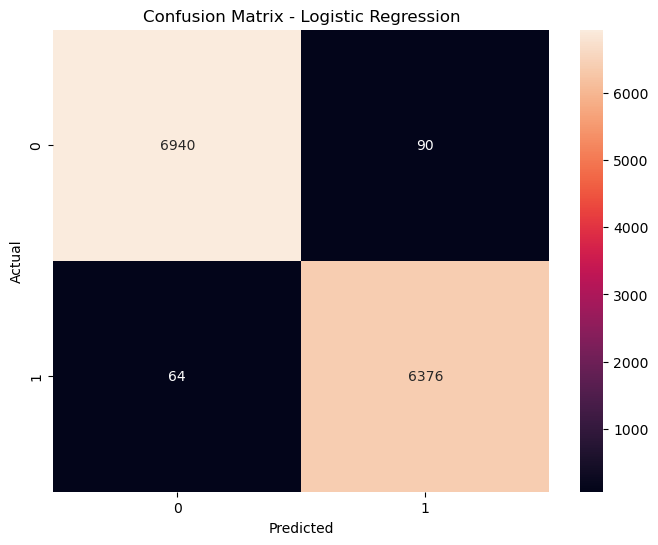

In [42]:
# Plotting confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, pred_lr, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

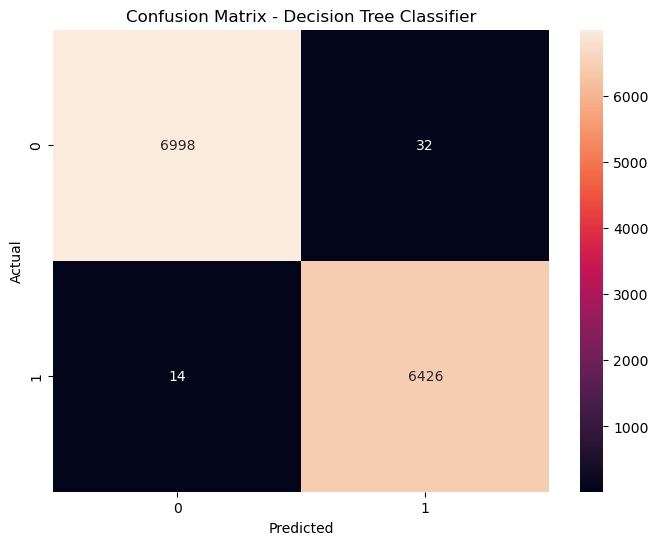

In [43]:
# Plotting confusion matrix for Decision Tree Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, pred_dtc, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

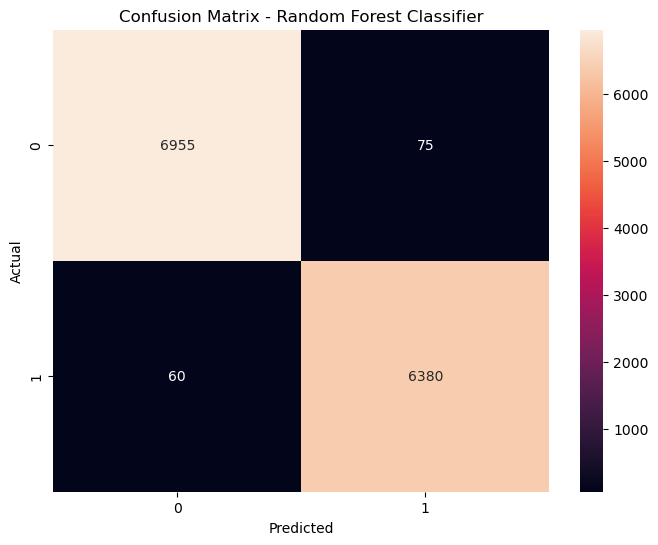

In [44]:
# Plotting confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, pred_rfc, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

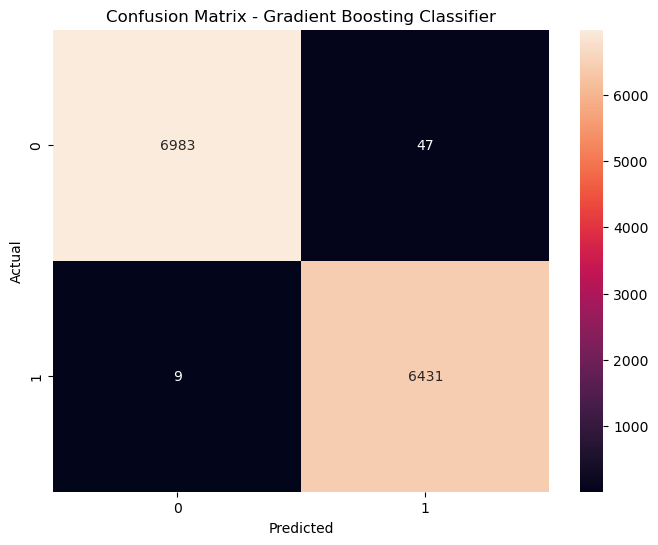

In [45]:
# Plotting confusion matrix for Gradient Boosting Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, pred_gbc, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()